42572- Swanand Wirkar
Problem Statement - Create and Art with Neural style transfer on given image using deep learning

In [9]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [10]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [11]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [18]:
content_image = load_image('Stack2.jpg')
style_image = load_image('starrynight.jfif')

# 2. Visualize Output

In [19]:
content_image.shape

TensorShape([1, 1080, 1920, 3])

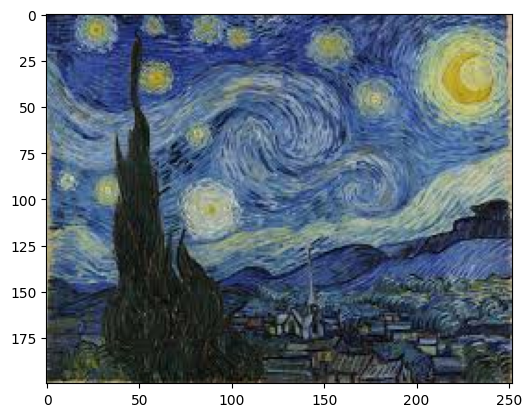

In [20]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [21]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

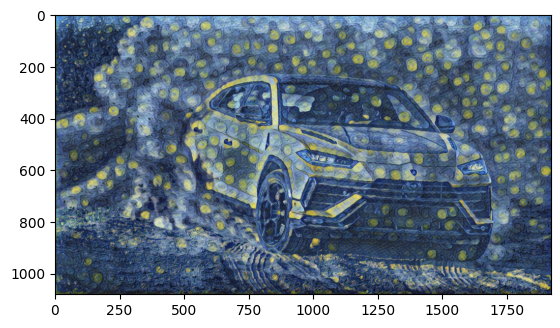

In [22]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [26]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True